In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import warnings

warnings.filterwarnings('ignore')

In [4]:
SRC = 'C:/Users/abiga/Desktop/Octavo semestre/Machine learning/Proyecto 1'
path = os.path.join(SRC,'oscars1.csv')

# Data exploration

In [5]:
oscars = pd.read_csv(path, encoding='unicode_escape')
oscars.head(5)

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
0,1927,1928,1,Best Actor,Male,Emil Jannings,White,The Last Command,VERDADERO
1,1927,1928,1,Best Actress,Female,Janet Gaynor,White,7th Heaven,VERDADERO
2,1928,1929,2,Best Actor,Male,Warner Baxter,White,In Old Arizona,VERDADERO
3,1928,1929,2,Best Actress,Female,Mary Pickford,White,Coquette,VERDADERO
4,1929,1930,3,Best Actor,Male,George Arliss,White,Disraeli,VERDADERO


In [4]:
oscars.shape

(10396, 9)

In [5]:
oscars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10396 entries, 0 to 10395
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10396 non-null  int64 
 1   year_ceremony  10396 non-null  int64 
 2   ceremony       10396 non-null  int64 
 3   Category       10396 non-null  object
 4   gender         10396 non-null  object
 5   name           10395 non-null  object
 6   Race           10396 non-null  object
 7   film           10092 non-null  object
 8   winner         10396 non-null  object
dtypes: int64(3), object(6)
memory usage: 731.1+ KB


Text(0.5, 1.0, 'Oscar Winners')

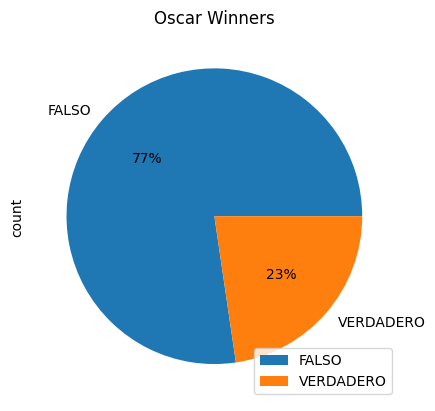

In [37]:
w = pd.DataFrame(oscars['winner'].value_counts())
w.groupby(['winner']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')
plt.title('Oscar Winners')

In [20]:
unique_labels, counts = np.unique(oscars['Race'], return_counts=True)
proportions = counts / len(oscars['Race'])

shannon_entropy = -np.sum(proportions * np.log(proportions))

print(f'Shannon entropy: {shannon_entropy:.2f}')

Shannon entropy: 0.21


In [6]:
oscars.isnull().sum()

year_film          0
year_ceremony      0
ceremony           0
Category           0
gender             0
name               1
Race               0
film             304
winner             0
dtype: int64

In [7]:
oscars.describe()

,year_film,year_ceremony,ceremony
count,10396.000000,10396.000000,10396.000000
mean,1974.476241,1975.476241,47.501828
std,26.144949,26.144949,26.101660
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [12]:
oscars.select_dtypes(include='number').corr()

,year_film,year_ceremony,ceremony
year_film,1.000000,1.000000,0.999983
year_ceremony,1.000000,1.000000,0.999983
ceremony,0.999983,0.999983,1.000000


array([[<Axes: title={'center': 'year_film'}>,
        <Axes: title={'center': 'year_ceremony'}>],
       [<Axes: title={'center': 'ceremony'}>, <Axes: >]], dtype=object)

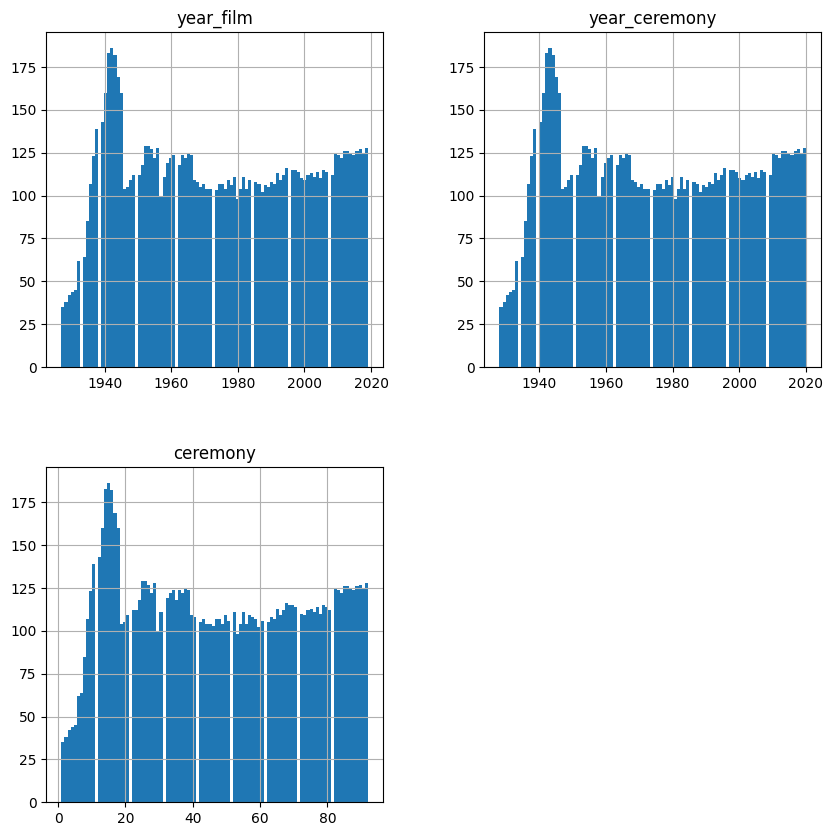

In [38]:
#Analisis de variable númericas
oscars.hist(figsize=(10,10), bins=100)


In [18]:
oscars['film'].value_counts()

film
A Star Is Born                    25
Titanic                           16
Moulin Rouge                      15
Mutiny on the Bounty              15
Little Women                      14
                                  ..
Good Will to Men                   1
The Legend of Rock-a-bye Point     1
No Hunting                         1
Speedy Gonzales                    1
Malcom X                           1
Name: count, Length: 4834, dtype: int64

In [181]:
oscars['Category'].value_counts()

Category
CINEMATOGRAPHY                               614
BEST PICTURE                                 563
Best Actress                                 456
Best Actor                                   452
WRITING (Adapted Screenplay)                 452
                                            ... 
MUSIC (Adaptation Score)                       3
DIRECTING (Comedy Picture)                     2
SPECIAL FOREIGN LANGUAGE FILM AWARD            2
SPECIAL ACHIEVEMENT AWARD (Sound Editing)      1
SPECIAL ACHIEVEMENT AWARD (Sound Effects)      1
Name: count, Length: 94, dtype: int64

In [15]:
oscars['Race'].value_counts()

Race
White       9949
Asian        232
Black        191
Hispanic      24
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender of Nominees')

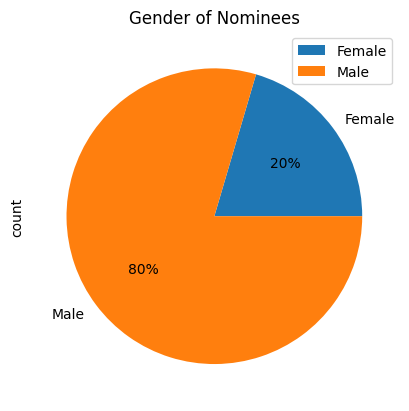

In [182]:
g = pd.DataFrame(oscars['gender'].value_counts())
g.groupby(['gender']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')
plt.title('Gender of Nominees')

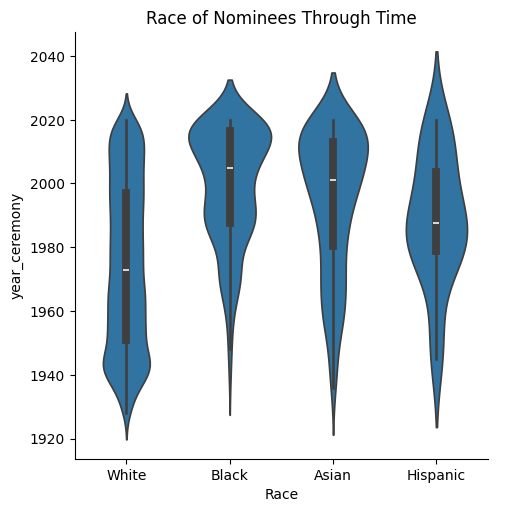

In [183]:
#Variación de etnicidad de los nominados a traves de los años 
sns.catplot(x= 'Race', y='year_ceremony', kind = 'violin', data = oscars)
plt.title('Race of Nominees Through Time')
plt.show()

Text(0.5, 1.0, 'Race of Winners')

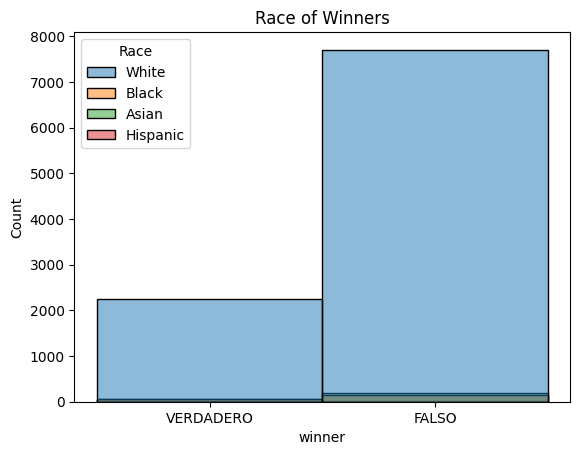

In [187]:
sns.histplot(oscars[['winner','Race']],x='winner',bins=20,hue='Race')
plt.title('Race of Winners')

Text(0.5, 1.0, 'Race of Nominees ')

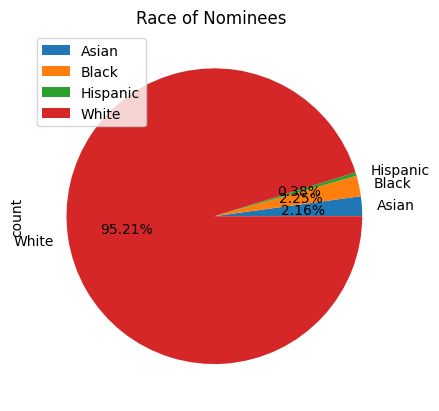

In [50]:
w_race = oscars.loc[oscars['winner']== 'VERDADERO', ['Race']]
n_winner = pd.DataFrame(w_race['Race'].value_counts())
n_winner.groupby(['Race']).sum().plot(kind='pie', y='count', autopct='%1.2f%%')
plt.title('Race of Nominees ')

In [5]:
#Drop year_film and ceremony since both give the same information as year_ceremony
oscars = oscars.drop(oscars.columns[[1,3]], axis=1)
oscars.head(5)

,year_film,ceremony,gender,name,Race,film,winner
0,1927,1,Male,Emil Jannings,White,The Last Command,VERDADERO
1,1927,1,Female,Janet Gaynor,White,7th Heaven,VERDADERO
2,1928,2,Male,Warner Baxter,White,In Old Arizona,VERDADERO
3,1928,2,Female,Mary Pickford,White,Coquette,VERDADERO
4,1929,3,Male,George Arliss,White,Disraeli,VERDADERO


# Split Train and Test Data

In [6]:
from sklearn.model_selection import train_test_split

X = oscars.drop('winner', axis=1)
y = oscars['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Create Pre-procesing Pipeline

In [7]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#y_train = pd.DataFrame(y_train)

Categorical_pipe = Pipeline(steps=[
    #For missing values 
    ('impute', SimpleImputer(strategy='constant', fill_value='Generic')),
    #To process categorial data
    ('one_hot', OneHotEncoder(handle_unknown='ignore',sparse=False)) 
])


Categorical_pipe.fit_transform(X_train.select_dtypes(exclude='number'))
#Pre procesing of target
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)


# Model KNeighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

class_pipe_KN = Pipeline(steps=[
    ('Prepro', Categorical_pipe),
    ('KClass', KNeighborsClassifier())
])

class_pipe_KN.fit(X_train,y_train)

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('KClass', KNeighborsClassifier())])

In [9]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

pred = class_pipe_KN.predict(X_test)
y_test_pred = cross_val_predict(class_pipe_KN, X_test, y_test, cv=3)

print(classification_report(y_test,pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2431
           1       0.36      0.22      0.28       688

    accuracy                           0.74      3119
   macro avg       0.58      0.56      0.56      3119
weighted avg       0.71      0.74      0.72      3119

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2431
           1       0.26      0.10      0.15       688

    accuracy                           0.74      3119
   macro avg       0.52      0.51      0.50      3119
weighted avg       0.67      0.74      0.69      3119



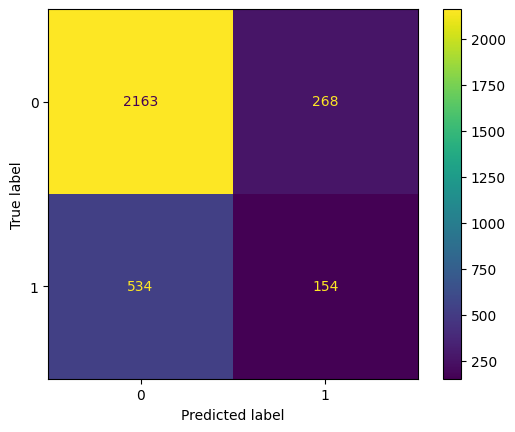

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(class_pipe_KN, X_test, y_test, cmap='viridis')
plt.show()

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

SCORING = ['accuracy', 'precision', 'recall', 'f1', 'neg_mean_squared_error']

param_grid = {
    'KClass__n_neighbors': randint(low=1, high=1000),
    'KClass__leaf_size': randint(low=1, high=1000),
}
grid_r = RandomizedSearchCV(class_pipe_KN,param_grid, cv=5,random_state=67, scoring= SCORING, refit='neg_mean_squared_error', error_score= 'raise', return_train_score=True)
grid_r.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('Prepro',
                                              Pipeline(steps=[('impute',
                                                               SimpleImputer(fill_value='Generic',
                                                                             strategy='constant')),
                                                              ('one_hot',
                                                               OneHotEncoder(handle_unknown='ignore',
                                                                             sparse=False,
                                                                             sparse_output=False))])),
                                             ('KClass',
                                              KNeighborsClassifier())]),
                   param_distributions={'KClass__leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002439F5C3520>,
                                        'KClass__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002439F64B5B0>},
                   random_state=67, refit='neg_mean_squared_error',
                   return_train_score=True,
                   scoring=['accuracy', 'precision', 'recall', 'f1',
                            'neg_mean_squared_error'])

In [21]:
print(grid_r.best_estimator_)

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('KClass',
                 KNeighborsClassifier(leaf_size=292, n_neighbors=280))])


In [28]:
from sklearn.model_selection import GridSearchCV



SCORING = ['accuracy','recall','precision', 'f1', 'neg_mean_squared_error']

param_grid = {
    'KClass__n_neighbors': [26, 32, 292],
    'KClass__leaf_size': [8, 37, 10, 280],
}
grid = GridSearchCV(class_pipe_KN,param_grid, cv=5, scoring= SCORING, refit= 'neg_mean_squared_error', error_score= 'raise', return_train_score=True)
grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Prepro',
                                        Pipeline(steps=[('impute',
                                                         SimpleImputer(fill_value='Generic',
                                                                       strategy='constant')),
                                                        ('one_hot',
                                                         OneHotEncoder(handle_unknown='ignore',
                                                                       sparse=False,
                                                                       sparse_output=False))])),
                                       ('KClass', KNeighborsClassifier())]),
             param_grid={'KClass__leaf_size': [8, 37, 10, 280],
                         'KClass__n_neighbors': [26, 32, 292]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['accuracy', 'recall', 'precision', 'f1',
                      'neg_mean_squared_error'])

In [70]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('SGDClass', SGDClassifier(alpha=0.15, max_iter=822))])

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.24916029, 0.22140803, 0.28124824, 0.20206251, 0.20923996,
        0.20883698, 0.21165557, 0.21362944, 0.20604911, 0.2182158 ,
        0.21163392, 0.2144268 ]),
 'std_fit_time': array([0.032801  , 0.019215  , 0.06138973, 0.00271548, 0.0091064 ,
        0.00507376, 0.00854407, 0.00674621, 0.00610253, 0.0127163 ,
        0.00949098, 0.01068568]),
 'mean_score_time': array([1.24048166, 1.08715515, 1.4774529 , 0.99691672, 1.03622794,
        1.11133761, 1.02371244, 0.98360314, 1.08589416, 1.06786566,
        0.98516407, 1.2601305 ]),
 'std_score_time': array([0.25315273, 0.07549726, 0.20680078, 0.02352275, 0.09397973,
        0.04240969, 0.02145393, 0.0189487 , 0.03827139, 0.04541242,
        0.02374828, 0.17185059]),
 'param_KClass__leaf_size': masked_array(data=[8, 8, 8, 37, 37, 37, 10, 10, 10, 280, 280, 280],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
     

In [31]:
y_pred_grid = best_model.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2431
           1       0.92      0.10      0.18       688

    accuracy                           0.80      3119
   macro avg       0.86      0.55      0.53      3119
weighted avg       0.82      0.80      0.73      3119



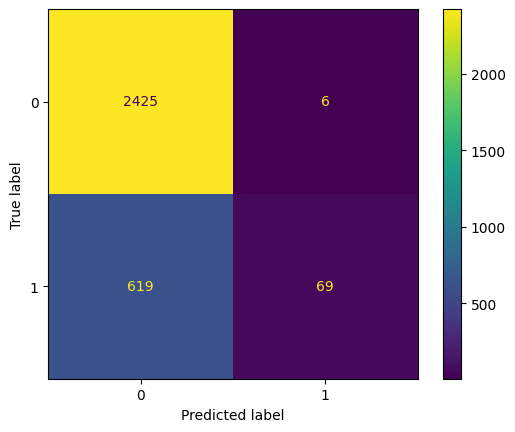

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='viridis')
plt.show()

# Model SGD

In [33]:
from sklearn.linear_model import SGDClassifier

class_pipe_SGD = Pipeline(steps=[
    ('Prepro', Categorical_pipe),
    ('SGDClass', SGDClassifier())
])

class_pipe_SGD.fit(X_train,y_train)

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('SGDClass', SGDClassifier())])

In [35]:
pred_SGD = class_pipe_SGD.predict(X_test)
y_pred_SGD = cross_val_predict(class_pipe_SGD, X_test, y_test, cv=3)

print(classification_report(y_test,pred_SGD))
print(classification_report(y_test,y_pred_SGD))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2431
           1       0.49      0.27      0.34       688

    accuracy                           0.78      3119
   macro avg       0.65      0.59      0.61      3119
weighted avg       0.74      0.78      0.75      3119

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2431
           1       0.49      0.25      0.33       688

    accuracy                           0.78      3119
   macro avg       0.65      0.59      0.60      3119
weighted avg       0.74      0.78      0.75      3119



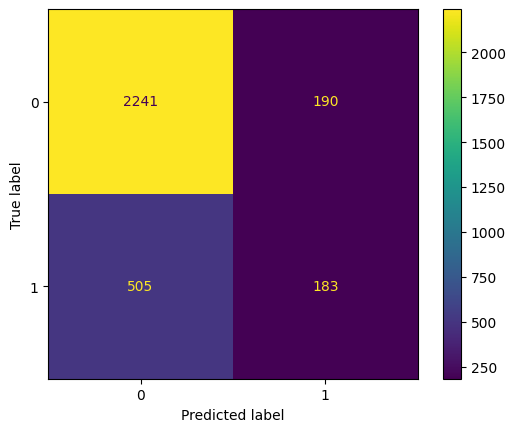

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(class_pipe_SGD, X_test, y_test, cmap='viridis')
plt.show()

In [74]:
param_grid = {
    'SGDClass__alpha': np.arange(0,1,0.005),
    'SGDClass__max_iter': randint(low=1, high=10000),
    'SGDClass__eta0': np.arange(0,100,0.05),
    'SGDClass__early_stopping': [True],
}

grid_r_SGD = RandomizedSearchCV(class_pipe_SGD,param_grid, cv=5,random_state=67, scoring= SCORING, refit='neg_mean_squared_error', error_score= 'raise', return_train_score=True)
grid_r_SGD.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('Prepro',
                                              Pipeline(steps=[('impute',
                                                               SimpleImputer(fill_value='Generic',
                                                                             strategy='constant')),
                                                              ('one_hot',
                                                               OneHotEncoder(handle_unknown='ignore',
                                                                             sparse=False,
                                                                             sparse_output=False))])),
                                             ('SGDClass', SGDClassifier())]),
                   param_distributions={'SGDClass__alpha': array([0.   , 0.005, 0.01 , 0.015, 0.0...
                                        'SGDClass__early_stopping': [True],
                                        'SGDClass__eta0': array([0.000e+00, 5.000e-02, 1.000e-01, ..., 9.985e+01, 9.990e+01,
       9.995e+01]),
                                        'SGDClass__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000243A2045E10>},
                   random_state=67, refit='neg_mean_squared_error',
                   return_train_score=True,
                   scoring=['accuracy', 'recall', 'precision', 'f1',
                            'neg_mean_squared_error'])

In [75]:
grid_r_SGD.best_estimator_

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('SGDClass',
                 SGDClassifier(alpha=0.335, early_stopping=True,
                               eta0=41.050000000000004, max_iter=1739))])

In [79]:
param_grid = {
    'SGDClass__alpha': [0.15, 0.09, 0.06, 0.335],
    'SGDClass__max_iter': [822, 54, 4918, 1739],
    'SGDClass__eta0': [54, 41.05],
    'SGDClass__early_stopping': [True],
}
grid_SGD = GridSearchCV(class_pipe_SGD,param_grid, cv=5, scoring= SCORING, refit= 'neg_mean_squared_error', error_score= 'raise', return_train_score=True)
grid_SGD.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Prepro',
                                        Pipeline(steps=[('impute',
                                                         SimpleImputer(fill_value='Generic',
                                                                       strategy='constant')),
                                                        ('one_hot',
                                                         OneHotEncoder(handle_unknown='ignore',
                                                                       sparse=False,
                                                                       sparse_output=False))])),
                                       ('SGDClass', SGDClassifier())]),
             param_grid={'SGDClass__alpha': [0.15, 0.09, 0.06, 0.335],
                         'SGDClass__early_stopping': [True],
                         'SGDClass__eta0': [54, 41.05],
                         'SGDClass__max_iter': [822, 54, 4918, 1739]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['accuracy', 'recall', 'precision', 'f1',
                      'neg_mean_squared_error'])

In [80]:
best_model_SGD = grid_SGD.best_estimator_
best_model_SGD

Pipeline(steps=[('Prepro',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(fill_value='Generic',
                                                strategy='constant')),
                                 ('one_hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False,
                                                sparse_output=False))])),
                ('SGDClass',
                 SGDClassifier(alpha=0.15, early_stopping=True, eta0=54,
                               max_iter=822))])

In [81]:
pred_SGD = best_model_SGD.predict(X_test)
print(classification_report(y_test,pred_SGD))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2431
           1       0.00      0.00      0.00       688

    accuracy                           0.78      3119
   macro avg       0.39      0.50      0.44      3119
weighted avg       0.61      0.78      0.68      3119



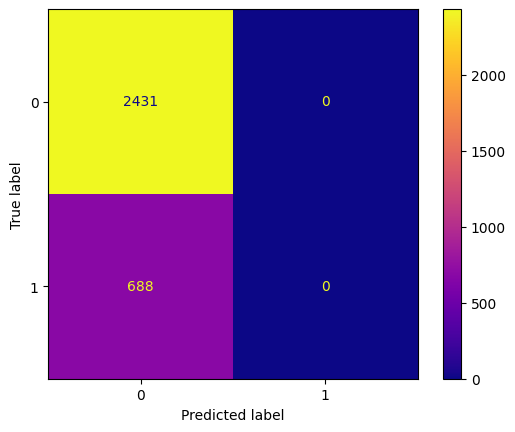

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model_SGD, X_test, y_test, cmap='plasma')
plt.show()